In [ ]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import kernel_ridge
from sklearn import model_selection
from sklearn import metrics

In [ ]:
# Load training and test data

path_to_train = '/content/drive/My Drive/AMATH482/HW3/wine_test.csv'
path_to_test = '/content/drive/My Drive/AMATH482/HW3/wine_training.csv'
path_to_new_batch = '/content/drive/My Drive/AMATH482/HW3/wine_new_batch.csv'

d_train = np.loadtxt(path_to_train, dtype=str, delimiter=",").astype("float")
d_test = np.loadtxt(path_to_test, dtype=str, delimiter=",").astype("float")
d_new = np.loadtxt(path_to_new_batch, dtype=str, delimiter=",").astype("float")

# First 11 columns
X_train = d_train[:, :-1]
X_test = d_test[:, :-1]

# Last column
Y_train = d_train[:, 11]
Y_test = d_test[:, 11]

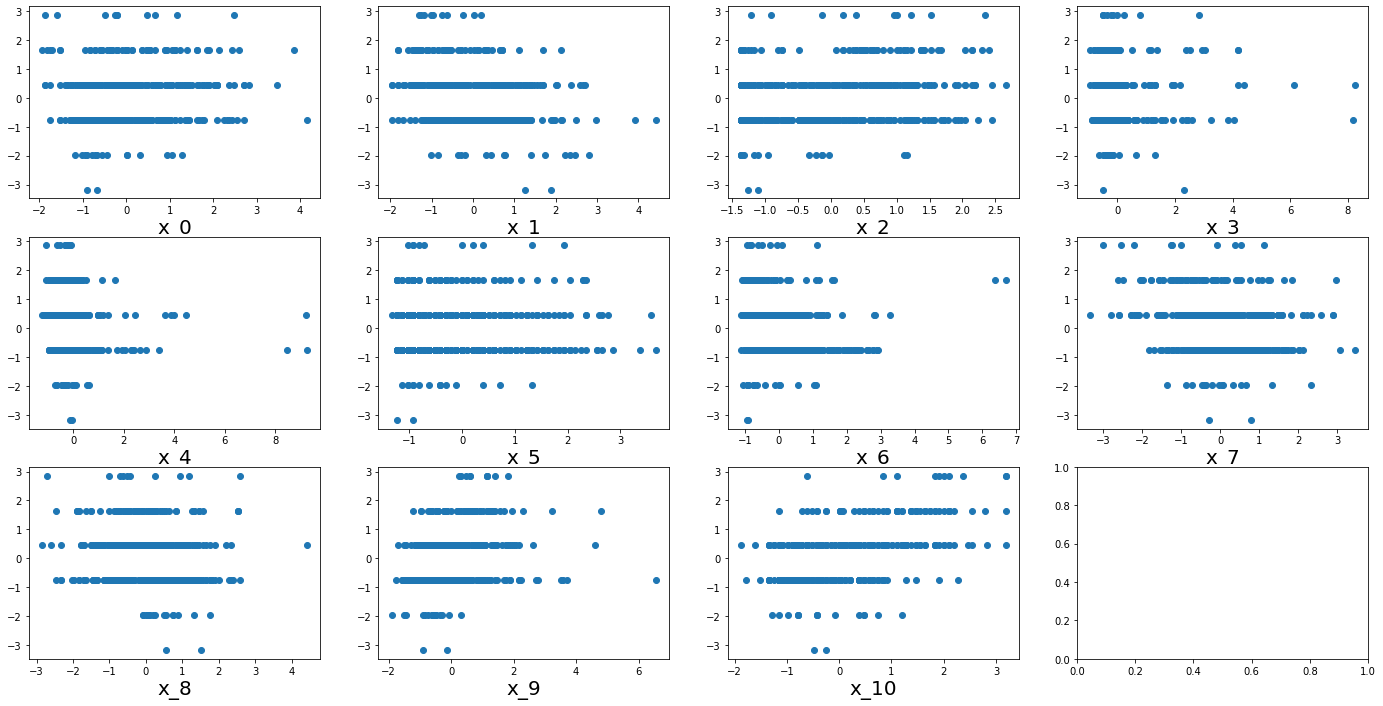

In [ ]:
# First need to normalize and center input features and outputs
X_train_N = X_train.shape[0]

X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)

X_train_normal = (X_train - np.matlib.repmat(X_train_mean, X_train_N, 1))/np.matlib.repmat(X_train_std, X_train_N, 1)
X_new_normal = (d_new - np.matlib.repmat(X_train_mean, d_new.shape[0], 1))/np.matlib.repmat(X_train_std, d_new.shape[0], 1)

Y_train_N = Y_train.shape[0]

Y_train_mean = np.mean(Y_train, axis=0)
Y_train_std = np.std(Y_train, axis=0)

Y_train_normal = (Y_train - Y_train_mean)/Y_train_std

# Do the same for test data
X_test_N = X_test.shape[0]

X_test_normal = (X_test - np.matlib.repmat(X_train_mean, X_test_N, 1))/np.matlib.repmat(X_train_std, X_test_N, 1)
Y_test_normal = (Y_test - Y_train_mean)/Y_train_std

# Visualize the data
fig, ax = plt.subplots(3,4, figsize=(24,12))

for j in range(3):
  for i in range(4):
    if (i == 3) & (j == 2):
      break
    ax[j][i].scatter( X_train_normal[:, i+ j*4], Y_train_normal )
    ax[j][i].set_xlabel('x_'+str(i + j*4), fontsize=20)

## Task 1

Use linear regression (least squares) to fit a linear model to the training set.

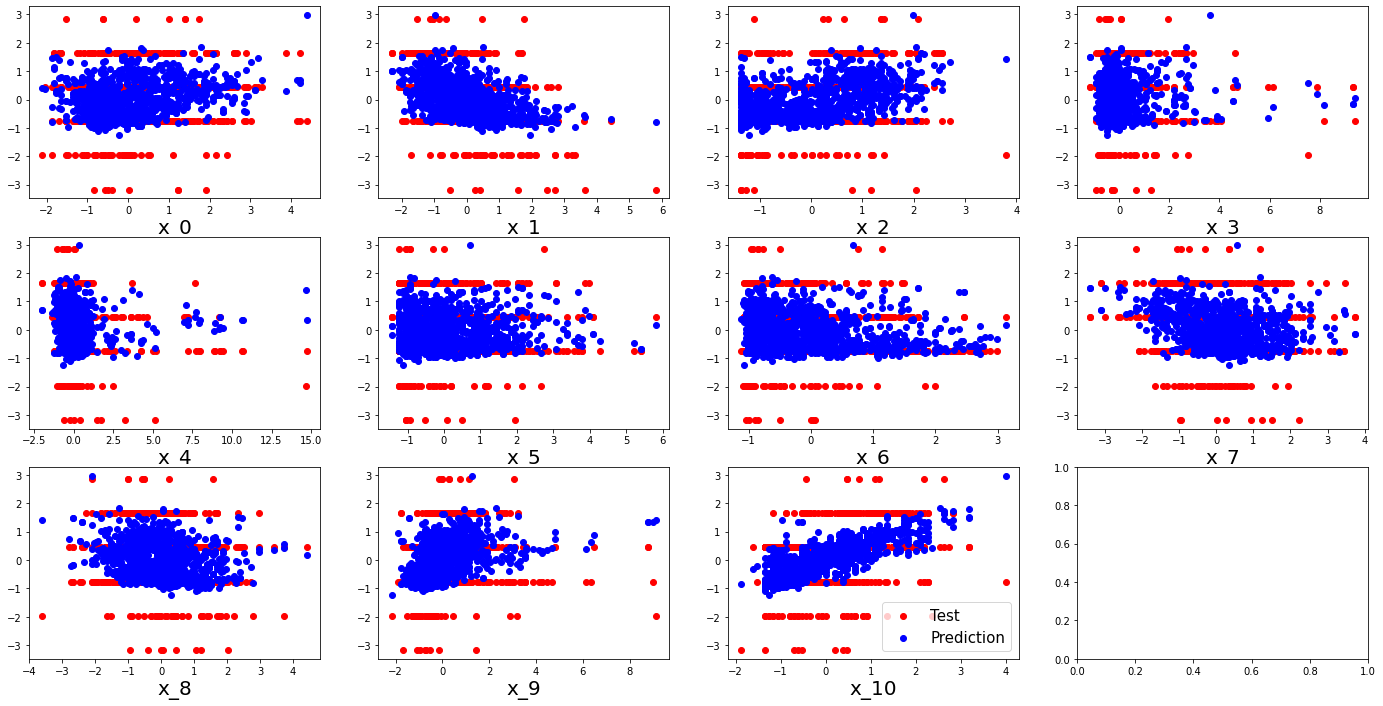

In [ ]:
# Create linear regression object
linreg = linear_model.LinearRegression()
# Fit data
linreg.fit(X_train_normal, Y_train_normal)
# Predict values of Y against the test set
Y_pred_normal = linreg.predict(X_test_normal)

fig, ax = plt.subplots(3,4, figsize=(24,12))

for j in range(3):
  for i in range(4):
    if (i == 3) & (j == 2):
      break
    ax[j][i].scatter( X_test_normal[:, i+ j*4], Y_test_normal, color='r', label='Test' )
    ax[j][i].scatter( X_test_normal[:, i+ j*4], Y_pred_normal, color='b', label='Prediction' )
    ax[j][i].set_xlabel('x_'+str(i + j*4), fontsize=20)

ax[2][2].legend(fontsize=15)

## Task 2 and 3

Use kernel ridge regression to fit a nonlinear model to the training set using the Gaussian (RBF) kernel
as well as the Laplacian kernel

Use 10-fold CV to tune the length scale 𝜎 and the regularization parameter 𝜆 for each of the above
kernels.

In [ ]:
# 10-fold Cross validation to find sigma and lambda for RBF kernel 
K_sgm = 20
K_lmbd = 20

sgm = np.linspace(-5, 5, K_sgm)
lmbd = np.linspace(-5, 5, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = kernel_ridge.KernelRidge(kernel='rbf')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2*(2**sgm[i])**2)

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=10, n_jobs=-1)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

In [ ]:
print("RBF Kernel")
# print(scores)

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()


print(ij_max)

print(scores.max())

print('log_2 sg:', sgm[ij_max[0]], 'log_2_lmbd: ', lmbd[ij_max[1]])
print("sigma: ", 2**sgm[ij_max[0]], "lambda: ", 2**lmbd[ij_max[1]])


RBF Kernel
[13  6]
-0.5998722368954958
log_2 sg: 1.8421052631578947 log_2_lmbd:  -1.8421052631578947
sigma:  3.585328384551423 lambda:  0.27891447944038594
gamma: 0.038896643420750734


In [ ]:
# 10-fold Cross validation to find sigma and lambda for Laplacian kernel 
K_sgm = 20
K_lmbd = 20

sgm = np.linspace(-5, 5, K_sgm)
lmbd = np.linspace(-5, 5, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = kernel_ridge.KernelRidge(kernel='laplacian')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2*(2**sgm[i])**2)

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=10, n_jobs=-1)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

In [ ]:
print("Laplacian Kernel")
# print(scores)

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()


print(ij_max)

print(scores.max())

print('log_2 sg:', sgm[ij_max[0]], 'log_2_lmbd: ', lmbd[ij_max[1]])
print("sigma: ", 2**sgm[ij_max[0]], "lambda: ", 2**lmbd[ij_max[1]])


Laplacian Kernel
[11  6]
-0.5993008712125949
log_2 sg: 0.7894736842105257 log_2_lmbd:  -1.8421052631578947
sigma:  1.7284437865632103 lambda:  0.27891447944038594


## Task 4

Obtain the training and test mean squared errors (MSEs) of all three models: linear
regression, and Gaussian and Laplacian kernels with the optimal hyperparameters found via CV.

In [ ]:
# MSE for Linear Regression
Y_train_predict = linreg.predict(X_train_normal)
Y_test_predict = linreg.predict(X_test_normal)

print("Training MSE for Linear Regression: ", str(metrics.mean_squared_error(Y_train_predict, Y_train_normal)))
print("Test MSE for Linear Regression: ", str(metrics.mean_squared_error(Y_test_predict, Y_test_normal)), "\n")

# MSE for RBF
rbf = kernel_ridge.KernelRidge(kernel="rbf", alpha=0.27891447944038594, gamma=1/(2*(2**3.585328384551423**2)))
rbf.fit(X_train_normal, Y_train_normal)
Y_train_predict = rbf.predict(X_train_normal)
Y_test_predict = rbf.predict(X_test_normal)

print("Training MSE for RBF: ", str(metrics.mean_squared_error(Y_train_predict, Y_train_normal)))
print("Test MSE for RBF: ", str(metrics.mean_squared_error(Y_test_predict, Y_test_normal)), "\n")

# MSE for Laplacian
lap = kernel_ridge.KernelRidge(kernel="laplacian", alpha=0.27891447944038594, gamma=1/(2**1.7284437865632103))
lap.fit(X_train_normal, Y_train_normal)
Y_train_predict = lap.predict(X_train_normal)
Y_test_predict = lap.predict(X_test_normal)

print("Training MSE for Laplacian: ", str(metrics.mean_squared_error(Y_train_predict, Y_train_normal)))
print("Test MSE for Laplacian: ", str(metrics.mean_squared_error(Y_test_predict, Y_test_normal)), "\n")


Training MSE for Linear Regression:  0.613286664489905
Test MSE for Linear Regression:  0.6577236288498409 

Training MSE for RBF:  0.8204280967317644
Test MSE for RBF:  0.7688150701221311 

Training MSE for Laplacian:  0.05139203022413222
Test MSE for Laplacian:  0.5782050859027209 



## Task 5

Use your three models to predict the quality of the new batch of wines and report the output of each
model on the 0-10 scale.


In [ ]:
# Linear Regression predictions
lin_pred = linreg.predict(X_new_normal) * Y_train_std + Y_train_mean
print(lin_pred)

# RBF predictions
rbf_pred = rbf.predict(X_new_normal) * Y_train_std + Y_train_mean
print(rbf_pred)

# Laplacian predictions
lap_pred = lap.predict(X_new_normal) * Y_train_std + Y_train_mean
print(lap_pred)

[6.04844329 5.51261797 5.45387107 6.43191258 6.14397344]
[5.78733751 5.59711445 5.61717949 5.8751159  5.82293072]
[5.81073403 5.638363   5.5886698  5.79239741 5.72115072]
